# Twitter Sentiment Analysis - 02 Exploratory Data Analysis

Exploratory Data Analysis (EDA) refers to performing visualizations and identifying significant patterns, such as correlated features, missing data, and outliers. EDA’s are also essential for providing hypotheses for why these patterns occur. It most likely won’t appear in your data product, data highlight, or dashboard, but it will help to inform all of these things.

In this notebook, we will extract some features from stock data and visualize their correlation. We will also look at the tweets from the previous notebook (01_Data_Wrangling) to extract the most common words, likes, time of tweet, and frequent user.

**Link(s) to previous notebook(s)**: \
00_Historical_Data_2014: https://github.com/parisvu07/Springboard_Data_Science/tree/main/Capstone_2_Twitter_Sentiment_Analysis \
01_Data_Wrangling:
https://github.com/parisvu07/Springboard_Data_Science/blob/main/Capstone_2_Twitter_Sentiment_Analysis/01_Data_Wrangling.ipynb

Quick fix for "Unable to render rich display": copy and paste the notebook link to https://nbviewer.org

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 2.1 EDA on Stock

In [2]:
#Importing stock price YTD
stock_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/01_stock_data.csv', encoding='latin-1')
stock_data = stock_data.drop(['Close'], axis=1)
stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume
0,2022-12-01,00:00:00,148.210007,149.130005,146.610001,148.309998,71250400
1,2022-12-02,00:00:00,145.960007,148.000000,145.649994,147.809998,65447400
2,2022-12-05,00:00:00,147.770004,150.919998,145.770004,146.630005,68826400
3,2022-12-06,00:00:00,147.070007,147.300003,141.919998,142.910004,64727200
4,2022-12-07,00:00:00,142.190002,143.369995,140.000000,140.940002,69721100


In [3]:
#Before we dive into further manipulation, let's look at the statistics in stock_data & the heat map
#because it can get really messy later on when we add in more columns
stock_data.describe()

,Open,High,Low,Adj Close,Volume
count,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,138.735716,140.166667,136.277144,137.876666,7.979322e+07
std,7.263553,7.275171,6.950076,6.970030,2.079060e+07
min,127.989998,129.949997,125.870003,126.040001,6.212830e+07
25%,131.389999,133.250000,129.889999,132.229996,6.900780e+07
50%,141.110001,141.800003,136.029999,136.500000,7.609700e+07
75%,145.350006,146.660004,141.160004,143.210007,8.229120e+07
max,149.500000,150.919998,146.610001,148.309998,1.601569e+08


Heatmap – A heatmap is a 2d representation of data that tells how much a variable is correlated to other variables. It contains values from -1 to 1. Suppose two variables x and y. Let us see the possible causes.

When the correlation between x and y is -1, that means x has a negative correlation with y. It simply means when the value of x increases, the value of y would decrease. The more the value is close to -1, the more will be the negative correlation.

When the correlation between x and y is 0. It means that x and y have no correlation and are independent.

When the correlation between x and y is 1, that means x has a positive correlation with y. Or simply, we can say whenever x increases, y increases too.

<AxesSubplot:>

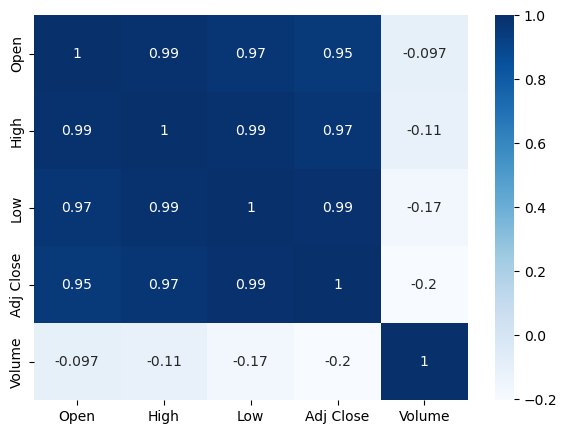

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(stock_data.corr(),cmap='Blues',annot=True)

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do is add new variables to our dataset that represents the difference between those values

### 2.1.1 Data Manipulation

In the following cells, we will examine the change in price between a given date and its next day's pricing (one period into the future) using the function .shift(). For example, "shifted_Open" implicates the next day's opening price for current date. From there, we will be able to find the percentage change of AAPL opening price.

In [5]:
#Creating duplicate 
eda_stock_data = stock_data.copy()

#Shifting Opening price
eda_stock_data['shifted_Open'] = eda_stock_data.Open.shift()

#Shifting High price
eda_stock_data['shifted_High'] = eda_stock_data.High.shift()

#Shifting Low price
eda_stock_data['shifted_Low'] = eda_stock_data.Low.shift()

#Shifting Adjusted closing price
eda_stock_data['shifted_Close'] = eda_stock_data['Adj Close'].shift()

#Shifting Volume
eda_stock_data['shifted_Volume'] = eda_stock_data.Volume.shift()

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,shifted_Close,shifted_Volume
0,2022-12-01,00:00:00,148.210007,149.130005,146.610001,148.309998,71250400,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,00:00:00,145.960007,148.000000,145.649994,147.809998,65447400,148.210007,149.130005,146.610001,148.309998,71250400.0
2,2022-12-05,00:00:00,147.770004,150.919998,145.770004,146.630005,68826400,145.960007,148.000000,145.649994,147.809998,65447400.0
3,2022-12-06,00:00:00,147.070007,147.300003,141.919998,142.910004,64727200,147.770004,150.919998,145.770004,146.630005,68826400.0
4,2022-12-07,00:00:00,142.190002,143.369995,140.000000,140.940002,69721100,147.070007,147.300003,141.919998,142.910004,64727200.0


After we have found the shifted price, we can find the difference in values for those features (x - x(n-1))

In [6]:
#Difference in values for Opening price
eda_stock_data['values_change_Open'] = eda_stock_data.Open.diff()

#Difference in values for High price
eda_stock_data['values_change_High'] = eda_stock_data.High.diff()

#Difference in values for Low price
eda_stock_data['values_change_Low'] = eda_stock_data.Low.diff()

#Difference in values for Adjusted closing price
eda_stock_data['values_change_Close'] = eda_stock_data['Adj Close'].diff()

#Difference in values for Volume
eda_stock_data['values_change_Volume'] = eda_stock_data.Volume.diff()

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,shifted_Close,shifted_Volume,values_change_Open,values_change_High,values_change_Low,values_change_Close,values_change_Volume
0,2022-12-01,00:00:00,148.210007,149.130005,146.610001,148.309998,71250400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,00:00:00,145.960007,148.000000,145.649994,147.809998,65447400,148.210007,149.130005,146.610001,148.309998,71250400.0,-2.250000,-1.130005,-0.960007,-0.500000,-5803000.0
2,2022-12-05,00:00:00,147.770004,150.919998,145.770004,146.630005,68826400,145.960007,148.000000,145.649994,147.809998,65447400.0,1.809998,2.919998,0.120010,-1.179993,3379000.0
3,2022-12-06,00:00:00,147.070007,147.300003,141.919998,142.910004,64727200,147.770004,150.919998,145.770004,146.630005,68826400.0,-0.699997,-3.619995,-3.850006,-3.720001,-4099200.0
4,2022-12-07,00:00:00,142.190002,143.369995,140.000000,140.940002,69721100,147.070007,147.300003,141.919998,142.910004,64727200.0,-4.880005,-3.930008,-1.919998,-1.970001,4993900.0


Now that we have the difference in values from one period to another, we can calculate one period return

In [7]:
#Percentage change for Opening price
eda_stock_data['%_change_Open'] = eda_stock_data.Open.pct_change().mul(100)

#Percentage change for High price
eda_stock_data['%_change_High'] = eda_stock_data.High.pct_change().mul(100)

#Percentage change for Low price
eda_stock_data['%_change_Low'] = eda_stock_data.Low.pct_change().mul(100)

#Percentage change for Adjusted closing price
eda_stock_data['%_change_Close'] = eda_stock_data['Adj Close'].pct_change().mul(100)

#Percentage change for Volume
eda_stock_data['%_change_Volume'] = eda_stock_data.Volume.pct_change().mul(100)

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,...,values_change_Open,values_change_High,values_change_Low,values_change_Close,values_change_Volume,%_change_Open,%_change_High,%_change_Low,%_change_Close,%_change_Volume
0,2022-12-01,00:00:00,148.210007,149.130005,146.610001,148.309998,71250400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-02,00:00:00,145.960007,148.000000,145.649994,147.809998,65447400,148.210007,149.130005,146.610001,...,-2.250000,-1.130005,-0.960007,-0.500000,-5803000.0,-1.518116,-0.757731,-0.654803,-0.337132,-8.144516
2,2022-12-05,00:00:00,147.770004,150.919998,145.770004,146.630005,68826400,145.960007,148.000000,145.649994,...,1.809998,2.919998,0.120010,-1.179993,3379000.0,1.240064,1.972972,0.082396,-0.798317,5.162925
3,2022-12-06,00:00:00,147.070007,147.300003,141.919998,142.910004,64727200,147.770004,150.919998,145.770004,...,-0.699997,-3.619995,-3.850006,-3.720001,-4099200.0,-0.473707,-2.398619,-2.641151,-2.536999,-5.955854
4,2022-12-07,00:00:00,142.190002,143.369995,140.000000,140.940002,69721100,147.070007,147.300003,141.919998,...,-4.880005,-3.930008,-1.919998,-1.970001,4993900.0,-3.318151,-2.668030,-1.352874,-1.378491,7.715304


We have added 15 new entries to our dataset. We can now create a heatmap with these new values and see their inter-correlation.

From the previous heatmap, we could realize that the original fields (Open, High, Low, Adj. Close, & Volume) aren’t very useful. So for more clarity, we will drop some of those values and take only the significant values for creating the heatmap.

<AxesSubplot:>

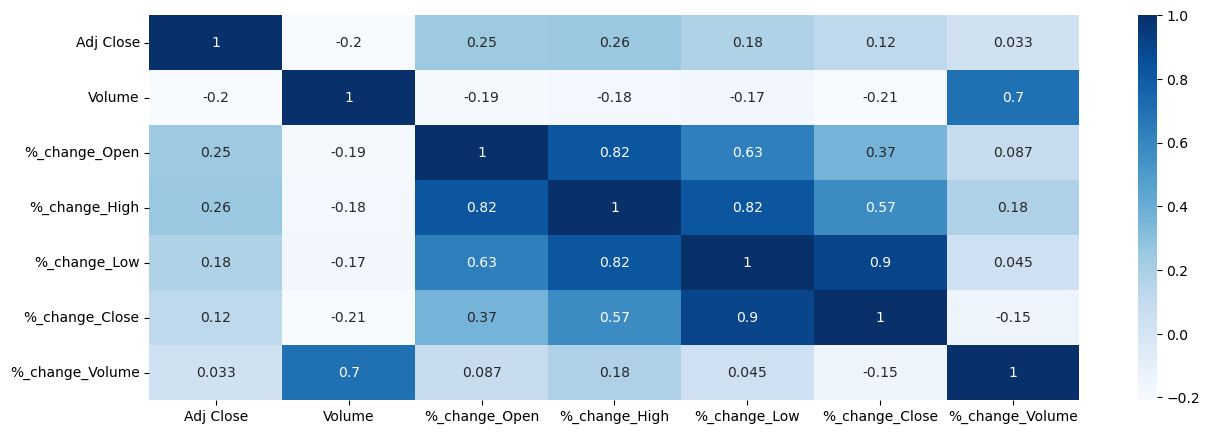

In [8]:
eda_stock_data = eda_stock_data.drop(['Open','High','Low','shifted_Open', 'shifted_High', 'shifted_Low', 'shifted_Close',
                                     'shifted_Volume', 'values_change_Open', 'values_change_High', 
                                      'values_change_Low', 'values_change_Close', 'values_change_Volume'],axis=1)
plt.figure(figsize=(15,5))
sns.heatmap(eda_stock_data.corr(),cmap='Blues',annot=True)

The main variable we are going to focus on in this dataset is the ‘Volume’. Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers. Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

The %_change_Volume shows the most positive correlation with the volume feature. This means that the greater the difference between the volume of the stock today and the volume of the stock price of yesterday, the greater will be the stocks traded that day. As there is no information about the number of buyers and sellers, we can only guess that a high difference in volume might attract more buyers. Whereas a fewer difference may attract more sellers.

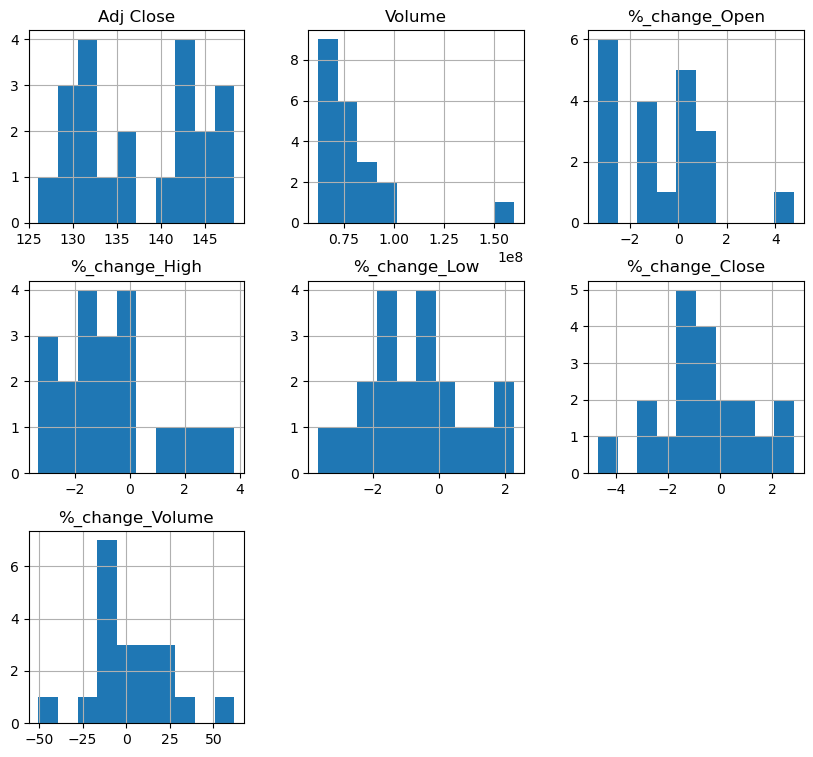

In [9]:
eda_stock_data.hist(figsize=[10,9]);

## 2.2 EDA on Tweets

In [10]:
tweets_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/01_tweets_data.csv')

/var/folders/v3/zfqmnfxs5z3dkfs5cn70l8bh0000gn/T/ipykernel_1834/3179322409.py:1: DtypeWarning: Columns (0,1,2,3,4,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/01_tweets_data.csv')


In [11]:
tweets_data.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis,Sentiment
0,2022-12-30,23:59:51,Cimaguatemala,0,Twitter for Android,"@bernardegar Tesla , jnj, aapl, Amazon",0.0,0.0,Neutral,0.0
1,2022-12-30,23:59:34,Keanu5004,0,Twitter Web App,Thanks &gt;https://t.co/tXysTF2CeA\nearn aroun...,0.2,0.2,Positive,1.0
2,2022-12-30,23:59:27,Smith28301,0,Twitter Web App,WILL GO BACK OVER $1K soon\n\nhttps://t.co/3in...,0.0,0.0,Neutral,0.0
3,2022-12-30,23:58:37,Smith28301,0,Twitter Web App,$PTON on fire. To know the details join the di...,0.0,0.0,Neutral,0.0
4,2022-12-30,23:58:30,Keanu5004,0,Twitter Web App,Join the most profitable trading group \nhttps...,0.5,0.5,Positive,1.0


In [12]:
tweets_data[tweets_data.isna().any(axis=1)]

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis,Sentiment
3164,2022-12-30,11:50:08,topstonks,0,topstonks,$AAPL seeing sustained chatter on wallstreetbe...,NaN,NaN,NaN,NaN
3165,Via https://t.co/DoXFBxbWjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3166,#aapl #wallstreetbets #investors https://t...,0.08333333333333334,-0.1,Negative,-1,NaN,NaN,NaN,NaN,NaN
3355,2022-12-30,08:59:47,topstonks,0,topstonks,$AAPL seeing sustained chatter on wallstreetbe...,NaN,NaN,NaN,NaN
3356,Via https://t.co/DoXFBxbWjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
687875,https://t.co/F7WytcVzKC,0.0,0.0,Neutral,0,NaN,NaN,NaN,NaN,NaN
709368,2022-12-29,02:40:06,Aprico2016,0,Aprico,超簡単にTwitterの動画を保存する方法！PC/Android/iPhoneで動画保存できる,NaN,NaN,NaN,NaN
709369,https://t.co/f1xeulzWq8,0.0,0.0,Neutral,0,NaN,NaN,NaN,NaN,NaN
709370,2022-12-29,02:40:06,Aprico2016,0,Aprico,iPhoneで登録したメールアカウントを削除する方法と削除できないときの対処法！,NaN,NaN,NaN,NaN


In [13]:
tweets_data.dropna(inplace=True)

### 2.2.1 Word Cloud

Now to actually understand the content of the tweets which people tweet, we need to know the most common types of words used in these tweets. To do so, we will have to create a Word Cloud of the top most words used in the tweets. We will make the word clouds based on the text.

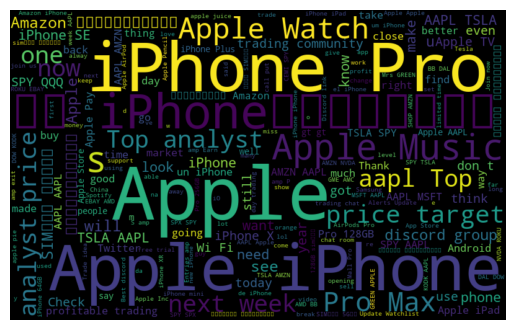

In [14]:
#We want to look at the common words for all tweets. But first, we need to remove all links
tweets_data['text'] = tweets_data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

from wordcloud import WordCloud
allWords = ' '.join([twts for twts in tweets_data['text']])
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.2.2 Subseting 

Now that we have imported the whole tweet dataset, we will be subsetting the tweets data into weekly increments. From there, we will create a function to filter out tweets that were produced during trading-hours, and tweets that were produced during after-hour. This will allow us to use the trading-hours tweets to predict closing price, and use after-hour tweets to predict opening price.

From the first notebook, we know that the tweets were scraped using UTC timezone 
We will create two separate dataframes:

tweets that were produced during trading-hours (1:30:00 PM UTC - 8:30:00 PM UTC) \
tweets that were produced during after-hour (8:30:00 PM PST - 1:30:00 PM PST)

In [15]:
tweets_data.Time.unique()

array(['23:59:51', '23:59:34', '23:59:27', ..., '23:28:44', '23:28:29',
       '23:28:18'], dtype=object)

In [16]:
#Subseting tweets that were produced during trading-hours & after-hour:
trading_hours = (tweets_data['Time'] >= '13:30:00') & (tweets_data['Time'] < '20:30:00')
after_hours = (tweets_data['Time'] >= '20:30:00') & (tweets_data['Time'] < '13:30:00')

trading_hours_tweets = tweets_data.loc[trading_hours]
after_hours_tweets = tweets_data.loc[after_hours]

In [17]:
#Viewing the tail to see if it starts at 13:30:00pm UTC
trading_hours_tweets.tail()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis,Sentiment
691242,2022-12-29,13:30:02,whitestone_UK,0,Buffer,iPhone 14 Pro WhiteStone Dome Glass BEST Glass...,0.300000,1.000000,Positive,1.0
691243,2022-12-29,13:30:02,NicheMktMedia,0,Buffer,What Are The Best Apple IPhone Cases,0.300000,1.000000,Positive,1.0
691244,2022-12-29,13:30:01,BooknewsGoods_j,0,bookbotgoods,【呪術廻戦】新着グッズ\n\n「iPhone12mini 対応 iPhone 12 mini...,0.000000,0.000000,Neutral,0.0
691245,2022-12-29,13:30:00,konyamoentame,2,Twitter for iPhone,まもなく23時から！\n\nエフエムひめ\n「穂月心の今夜もエンタメ」\n\n木曜深夜23時...,0.000000,0.000000,Neutral,0.0
691246,2022-12-29,13:30:00,PrestonMcMurry,1,Twitter Web App,@SelectWomanTaft @Baldassano I guess it wasn't...,0.535714,0.285714,Positive,1.0


In [18]:
#Inspecting the head to see if it ends at 20:30:00pm UTC
trading_hours_tweets.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis,Sentiment
853,2022-12-30,20:29:43,LlcBillionaire,0,Twitter Web App,10 New Year’s food traditions around the world,0.454545,0.136364,Positive,1.0
854,2022-12-30,20:29:32,skitontop1,0,Twitter Web App,Entries &amp; exits Daily! \nDiscord link belo...,0.500000,0.300000,Positive,1.0
855,2022-12-30,20:29:28,StockJobberOG,0,Twitter Web App,$AAPL $MSFT $SPY $TSLA $AMZN $BRK.B\n\n,0.000000,0.000000,Neutral,0.0
856,2022-12-30,20:29:11,LlcBillionaire,0,Twitter Web App,The biggest — and maybe the best — financial r...,0.150000,0.500000,Positive,1.0
857,2022-12-30,20:28:29,skitontop1,0,Twitter Web App,"#1 Chatroom interms of \n\nalert,calls,Analysi...",1.000000,0.600000,Positive,1.0


In [19]:
#Inspecting tweets during after-hours
after_hours_tweets.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis,Sentiment


Looks like our function only queried tweets that were posted during trading hours. Even better since we only care about tweets produced during trading hours!

### 2.2.3 Trading-hour Tweets

In [20]:
len(trading_hours_tweets.text)

118345

In [21]:
#Get the percentage of positive tweets during trading hours
ptweets_trading_hours = trading_hours_tweets[trading_hours_tweets.Analysis == 'Positive']
ptweets_trading_hours = ptweets_trading_hours['text']

round(len(ptweets_trading_hours)/len(trading_hours_tweets['text'])*100, 2)

35.28

In [22]:
#Get the percentage of negative tweets during trading hours
ntweets_trading_hours = trading_hours_tweets[trading_hours_tweets.Analysis == 'Negative']
ntweets_trading_hours = ntweets_trading_hours['text']

round(len(ntweets_trading_hours)/len(trading_hours_tweets['text'])*100, 2)

10.06

In [23]:
#Get the percentage of neutral tweets during trading hours
neutraltweets_trading_hours = trading_hours_tweets[trading_hours_tweets.Analysis == 'Neutral']
neutraltweets_trading_hours = neutraltweets_trading_hours['text']

round(len(neutraltweets_trading_hours)/len(trading_hours_tweets['text'])*100, 2)

54.66

<AxesSubplot:title={'center':'Sentiment Analysis during Trading Hours'}, xlabel='Sentiment', ylabel='Counts'>

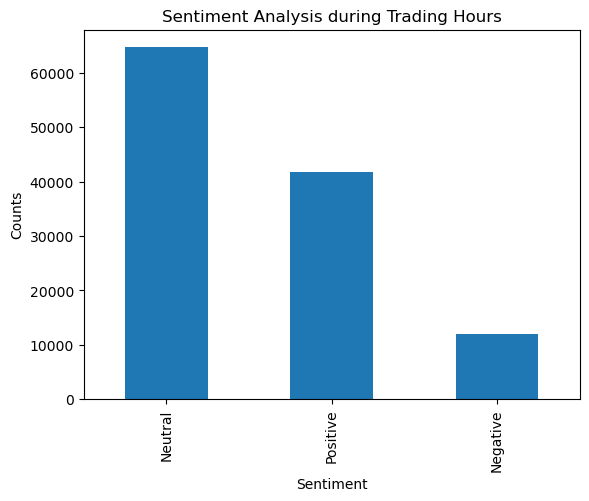

In [24]:
#Show the value counts
trading_hours_tweets['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis during Trading Hours')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trading_hours_tweets['Analysis'].value_counts().plot(kind='bar')

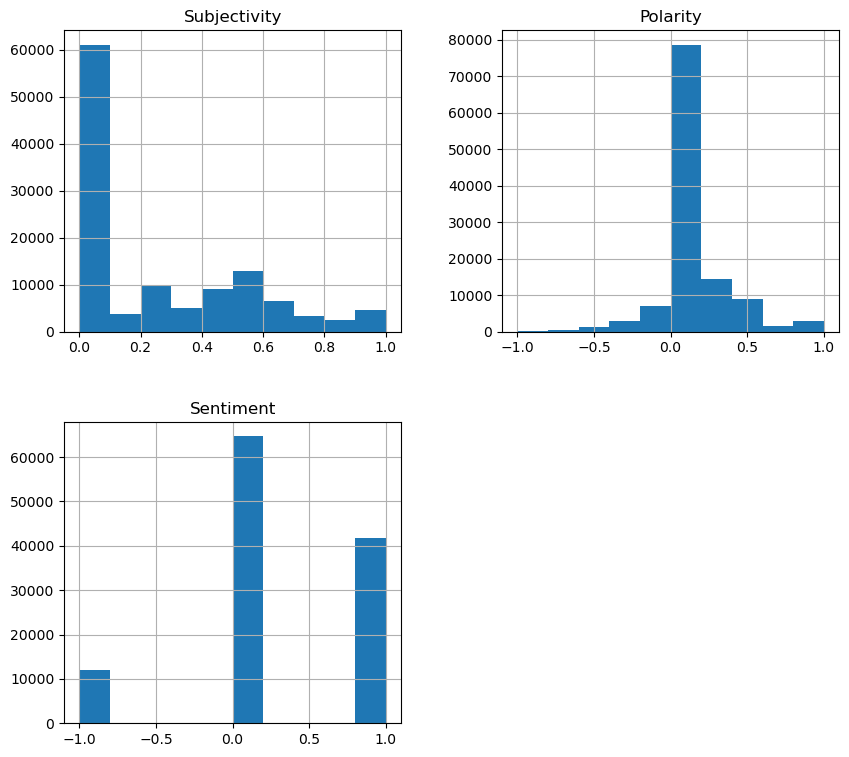

In [25]:
trading_hours_tweets.hist(figsize=[10,9]);

### 2.2.4 Frequency

In [26]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting in October 2022'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


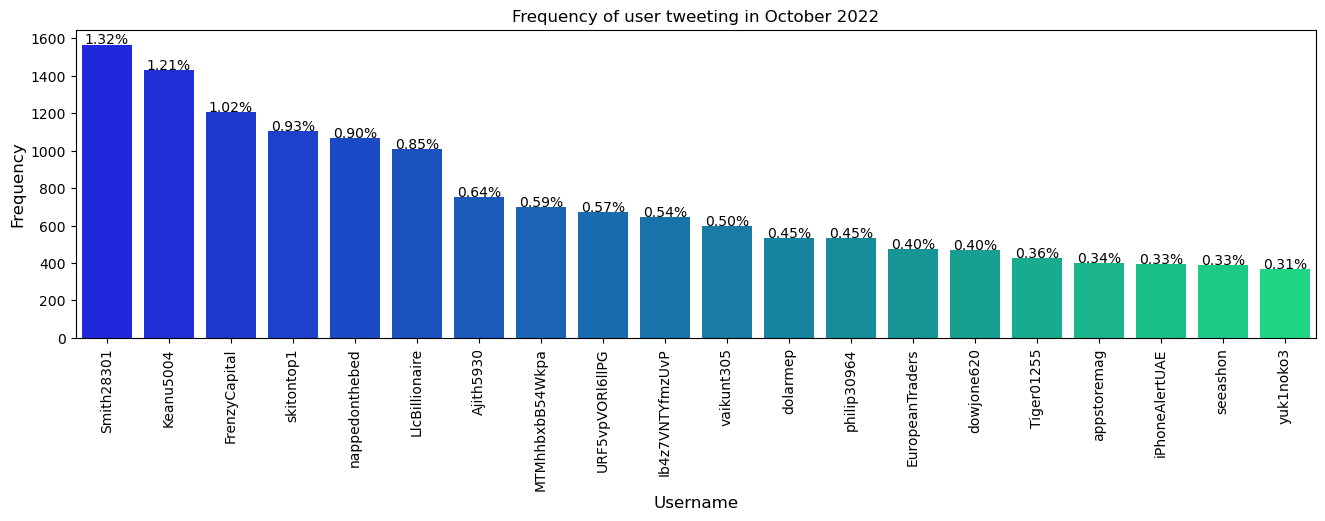

In [27]:
plot_frequency_charts(trading_hours_tweets, 'user', 'Username', 'winter')

We also want to visualize which date users were the most active on Twitter

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


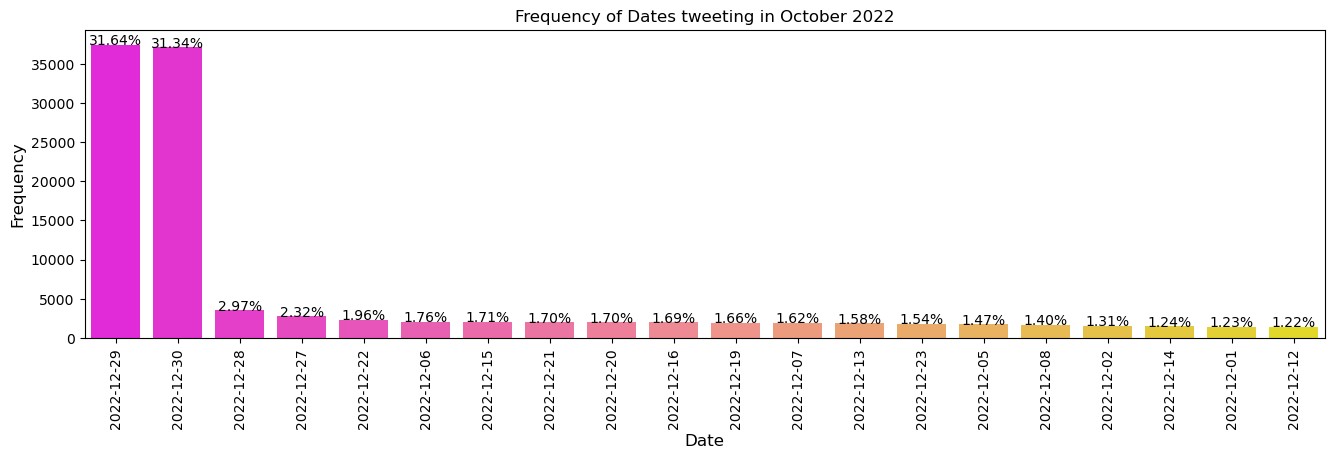

In [28]:
plot_frequency_charts(trading_hours_tweets, 'Dates', 'Date', 'spring')

The most "popular" time of tweet should also be visualized. Just a reminder that we're looking at UTC time, so 13:30pm UTC is 5:30am PST and 8:30am EST

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


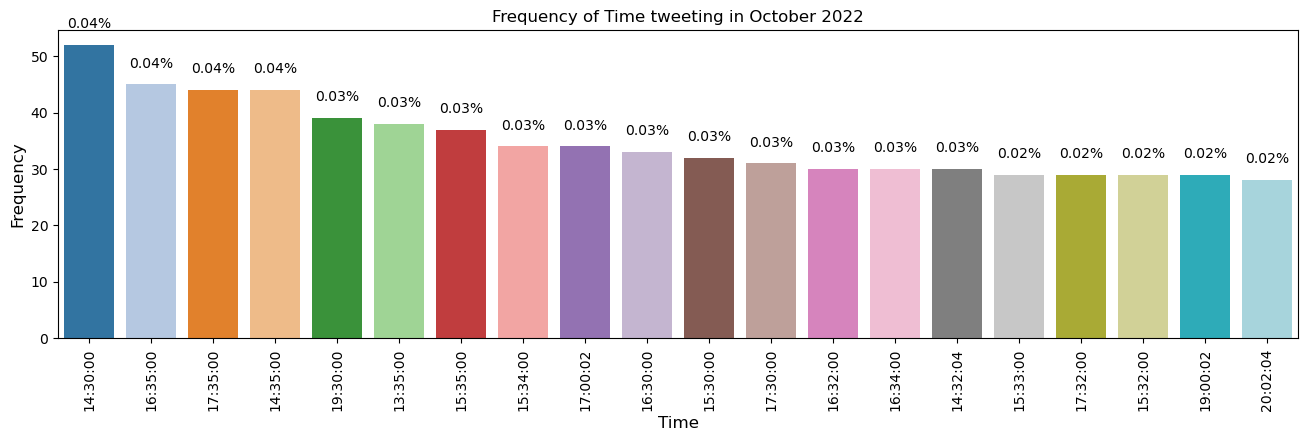

In [29]:
plot_frequency_charts(trading_hours_tweets, 'Time', 'Time', 'tab20')

What is the most common number of likes in a tweet in December 2022?

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


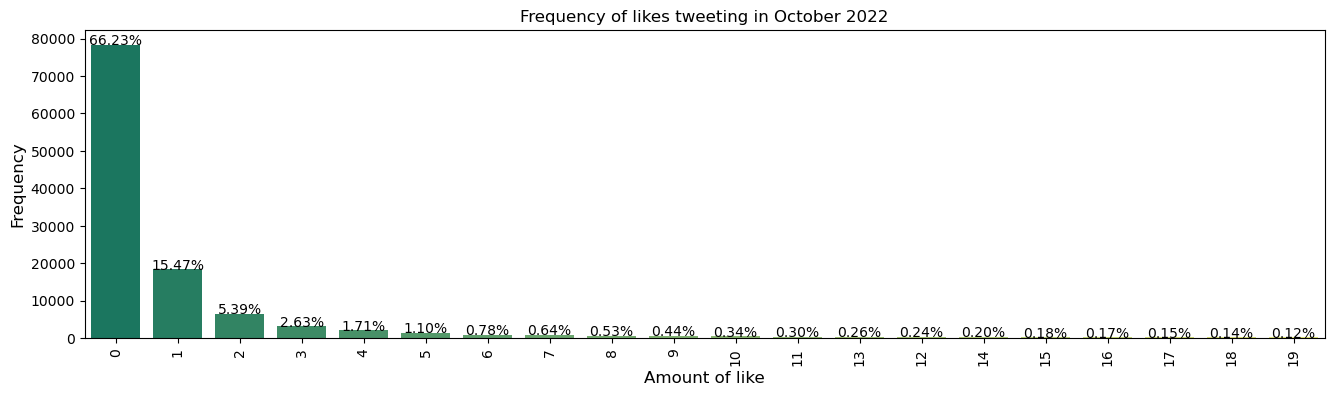

In [30]:
plot_frequency_charts(trading_hours_tweets, 'likes', 'Amount of like', 'summer')

What devices were the users using to post these tweets?

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


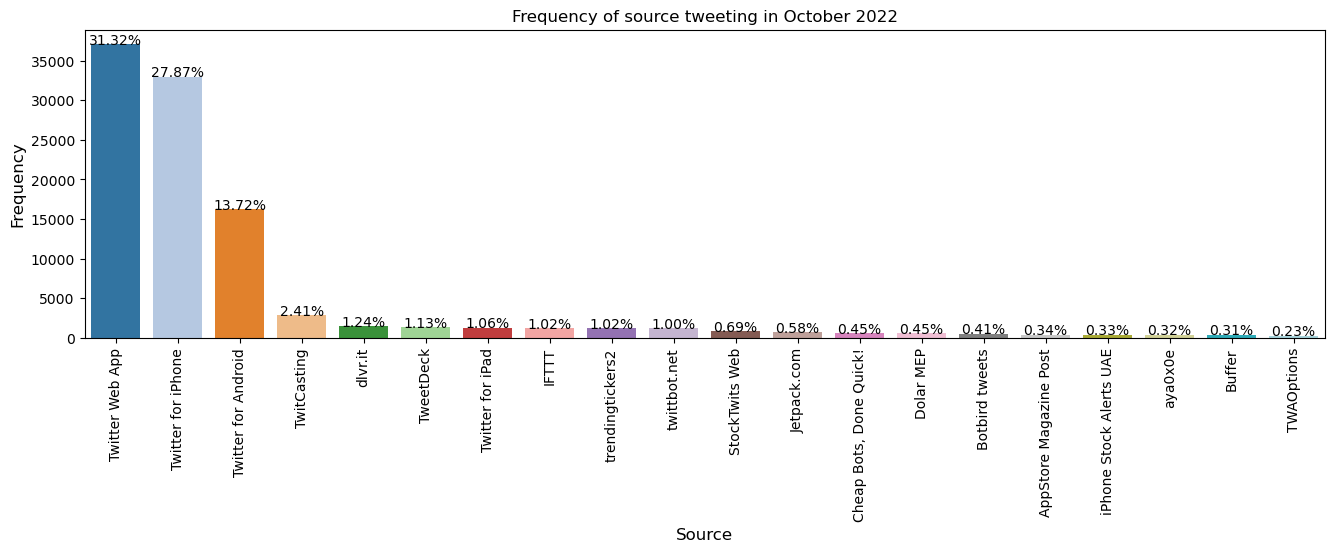

In [31]:
plot_frequency_charts(trading_hours_tweets, 'source', 'Source', 'tab20')

## 2.3 Saving

In [32]:
eda_stock_data.to_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/02_stock_data.csv', index=False)
trading_hours_tweets.to_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/02_tweets_data.csv', index=False)